# **Alzheimer - VGG 19 Model **

# Importing libraries

In [ ]:
import os
import cv2
import pickle
import tqdm
import PIL

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model




%matplotlib inline
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import skimage.io
from sklearn.metrics import *
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from random import randint
import os
from distutils.dir_util import copy_tree, remove_tree




from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
from skimage.io import imread, imshow
from keras.callbacks import ModelCheckpoint

from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score


np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Defining data paths

In [ ]:
train_path = '/content/drive/MyDrive/Thesis/Main_Dataset/Train'
test_path = '/content/drive/MyDrive/Thesis/Main_Dataset/Test'
val_path = '/content/drive/MyDrive/Thesis/Main_Dataset/Val'

# Converting image to pixels

Non_Demented


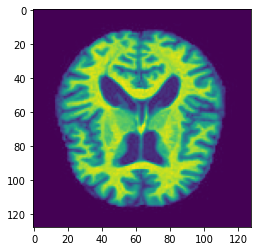

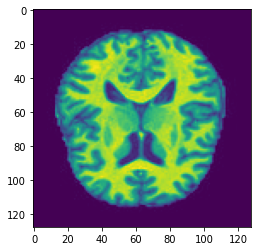

Mild_Demented


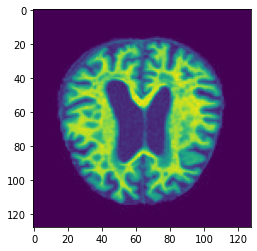

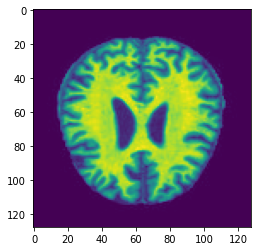

Moderate_Demented


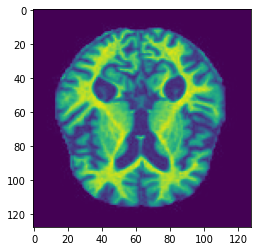

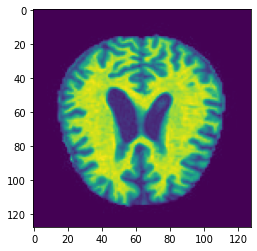

Very_Mild_Demented


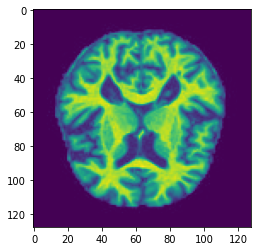

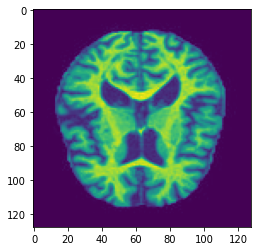

In [ ]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [ ]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory=train_path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                 directory=val_path,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 class_mode='categorical')
image_generator_submission = ImageDataGenerator(rescale=1/255) 
submission = image_generator_submission.flow_from_directory(
                                                 directory=test_path,
                                                 shuffle=False,
                                                 target_size=(224,224), 
                                                 class_mode=None)

Found 3584 images belonging to 4 classes.
Found 255 images belonging to 4 classes.
Found 641 images belonging to 4 classes.


# VGG19 Model

In [ ]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

modelvgg.save('VggModel.h5')
print('Model Saved!')

80134624/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Model Saved!


In [ ]:
savedModel=load_model('VggModel.h5')
savedModel.summary() 

modelvgg.save_weights('VggModelWeights.h5')
print('Model Saved!')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
     
      tf.keras.metrics.AUC(name='auc')]

callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss',
                                            patience=2,
                                        verbose = 1,
                                          save_best_only=True)]

In [ ]:


EPOCHS = 30
BATCH_SIZE = 8
modelvgg.compile(optimizer='adam',
loss= tf.losses.CategoricalCrossentropy(), metrics=METRICS)


In [ ]:
history1 = modelvgg.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=callbacks) 




Epoch 1/30
448/448 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000
Epoch 1: val_loss did not improve from 0.26084
448/448 [==============================] - 32s 70ms/step - loss: 0.0100 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.4454 - val_accuracy: 0.9255 - val_precision: 0.8538 - val_recall: 0.8471 - val_auc: 0.9679
Epoch 2/30
448/448 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9994 - precision: 0.9989 - recall: 0.9986 - auc: 1.0000
Epoch 2: val_loss did not improve from 0.26084
448/448 [==============================] - 32s 71ms/step - loss: 0.0109 - accuracy: 0.9994 - precision: 0.9989 - recall: 0.9986 - auc: 1.0000 - val_loss: 0.3575 - val_accuracy: 0.9245 - val_precision: 0.8532 - val_recall: 0.8431 - val_auc: 0.9810
Epoch 3/30
448/448 [==============================] - ETA: 0s - loss: 0.1619 - accuracy: 0.9768 - precision: 0.9542 - 

In [ ]:
modelvgg = load_model('.mdl_wts.hdf5') 
modelvgg.save('/content/drive/MyDrive/Main_Dataset/modelvgg19.h5')

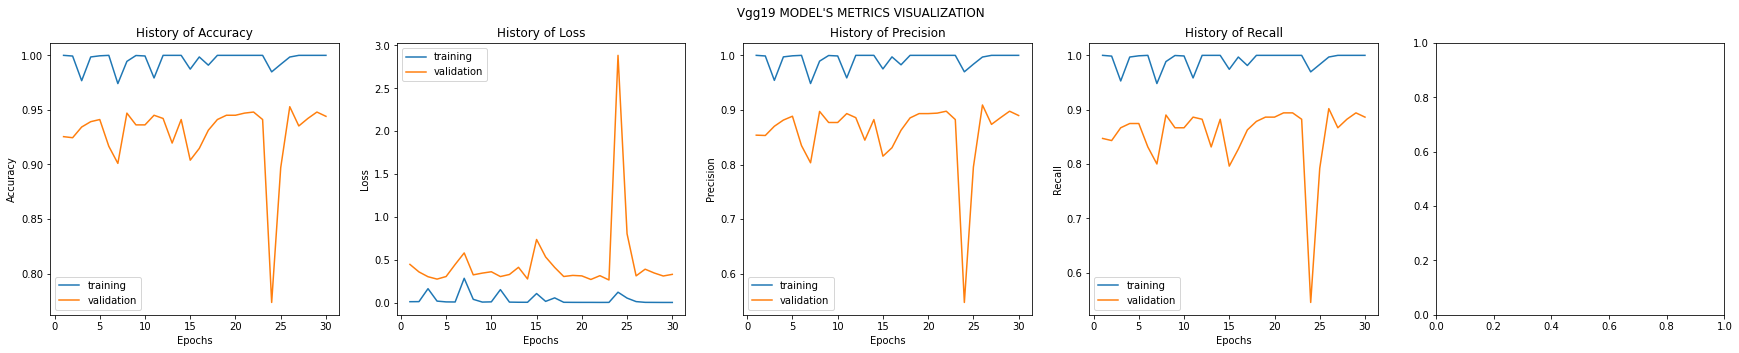

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,precision,val_precision, recall, val_recall):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" Vgg19 MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    
    ax3.plot(range(1, len(precision) + 1), precision)
    ax3.plot(range(1, len(val_precision) + 1), val_precision)
    ax3.set_title('History of Precision')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('Precision')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(recall) + 1), recall)
    ax4.plot(range(1, len(val_recall) + 1), val_recall)
    ax4.set_title('History of Recall')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Recall')
    ax4.legend(['training', 'validation'])

 

    
  


    plt.show()
    

Train_Val_Plot(history1.history['accuracy'],history1.history['val_accuracy'],
               history1.history['loss'],history1.history['val_loss'], 
               history1.history['precision'],history1.history['val_precision'],
               history1.history['recall'],history1.history['val_recall'],
               
               )

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Thesis/Main_Dataset/Train',

image_size=(224,224),
batch_size=8
)
class_names = train_ds.class_names
print(class_names)
train_ds

Found 4478 files belonging to 4 classes.
['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
y_pred = modelvgg.predict(submission)
y_pred = np.argmax(y_pred, axis=1)

21/21 [==============================] - 4s 169ms/step


In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
def generateCR(y_pred):
    clf_report = classification_report(submission.classes, y_pred, target_names=["Mild Demented","Moderate Demented","Non Demented","Very Mild Demented"],digits=4)
    print(clf_report)
    clf_report = classification_report(submission.classes, y_pred, target_names=["Mild Demented","Moderate Demented","Non Demented","Very Mild Demented"], output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,  cmap="GnBu")

In [ ]:
from sklearn.metrics import confusion_matrix
def generateCM(y_pred,modelName):
    array = confusion_matrix(submission.classes, y_pred)
    df_cm = pd.DataFrame(array, index = ["Mild Demented","Moderate Demented","Non Demented","Very Mild Demented"],
                      columns = ["Mild Demented","Moderate Demented","Non Demented","Very Mild Demented"])
    plt.figure(figsize = (10,8))

    
    cm_plot = sns.heatmap(df_cm, annot=True, cmap='GnBu', fmt='d', vmin=0, vmax=60)
    cm_plot.set_xlabel('Predicted Labels')
    cm_plot.set_ylabel('True Labels')
    cm_plot.set_title('Confusion Matrix From '+modelName, size=12)

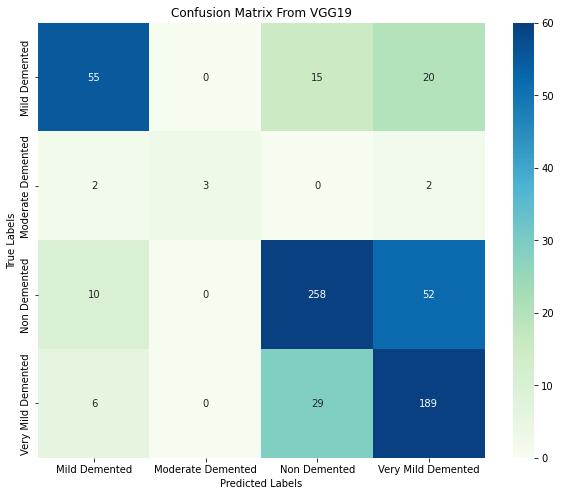

In [ ]:
generateCM(y_pred, "VGG19")

                    precision    recall  f1-score   support

     Mild Demented     0.7534    0.6111    0.6748        90
 Moderate Demented     1.0000    0.4286    0.6000         7
      Non Demented     0.8543    0.8063    0.8296       320
Very Mild Demented     0.7186    0.8438    0.7762       224

          accuracy                         0.7878       641
         macro avg     0.8316    0.6724    0.7202       641
      weighted avg     0.7943    0.7878    0.7867       641



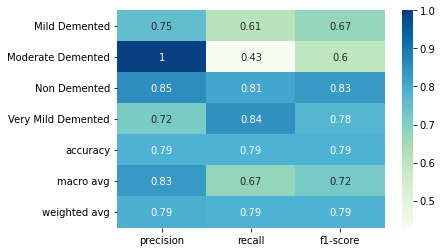

In [ ]:
generateCR(y_pred)

# **Resnet** **V2**


In [ ]:
resnet50v2 = ResNet50V2 (input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

94668760/94668760 [==============================] - 0s 0us/step


In [ ]:
for layer in resnet50v2.layers:
    layer.trainable=False

modelresnet50v2=Sequential()
modelresnet50v2.add(resnet50v2)
modelresnet50v2.add(Dropout(0.5))
modelresnet50v2.add(Flatten())
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Dense(64,kernel_initializer='he_uniform'))
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Activation('relu'))
modelresnet50v2.add(Dropout(0.5))
modelresnet50v2.add(Dense(64,kernel_initializer='he_uniform'))
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Activation('relu'))
modelresnet50v2.add(Dropout(0.5))
modelresnet50v2.add(Dense(64,kernel_initializer='he_uniform'))
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Activation('relu'))
modelresnet50v2.add(Dropout(0.5))
modelresnet50v2.add(Dense(32,kernel_initializer='he_uniform'))
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Activation('relu'))
modelresnet50v2.add(Dropout(0.5))
modelresnet50v2.add(Dense(32,kernel_initializer='he_uniform'))
modelresnet50v2.add(BatchNormalization())
modelresnet50v2.add(Activation('relu'))
modelresnet50v2.add(Dense(4,activation='softmax'))
modelresnet50v2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [ ]:
EPOCHS = 30
BATCH_SIZE = 8
modelresnet50v2.compile(optimizer='adam',
loss= tf.losses.CategoricalCrossentropy(), metrics=METRICS)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)


In [ ]:
history=modelresnet50v2.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=callback) 

Epoch 1/30
448/448 [==============================] - 23s 39ms/step - loss: 1.1720 - accuracy: 0.7536 - precision: 0.5127 - recall: 0.2881 - auc: 0.7631 - val_loss: 1.0700 - val_accuracy: 0.7539 - val_precision: 0.6250 - val_recall: 0.0392 - val_auc: 0.7882
Epoch 2/30
448/448 [==============================] - 16s 36ms/step - loss: 1.0741 - accuracy: 0.7510 - precision: 0.5039 - recall: 0.2670 - auc: 0.7737 - val_loss: 1.0214 - val_accuracy: 0.7716 - val_precision: 0.8438 - val_recall: 0.1059 - val_auc: 0.8123
Epoch 3/30
448/448 [==============================] - 16s 36ms/step - loss: 1.0348 - accuracy: 0.7658 - precision: 0.5636 - recall: 0.2796 - auc: 0.7918 - val_loss: 0.9507 - val_accuracy: 0.7902 - val_precision: 0.8361 - val_recall: 0.2000 - val_auc: 0.8395
Epoch 4/30
448/448 [==============================] - 16s 36ms/step - loss: 1.0099 - accuracy: 0.7722 - precision: 0.5948 - recall: 0.2785 - auc: 0.8018 - val_loss: 0.9470 - val_accuracy: 0.7843 - val_precision: 0.8070 - val_r

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)
def Train_Val_Plot(acc,val_acc,loss,val_loss, auc,val_auc,precision,val_precision, recall, val_recall, f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5, ax6) = plt.subplots(1,6, figsize= (35,5))
    fig.suptitle(" Resnet50-V2 MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
       
    ax5.plot(range(1, len(recall) + 1), recall)
    ax5.plot(range(1, len(val_recall) + 1), val_recall)
    ax5.set_title('History of Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])
        
    ax6.plot(range(1, len(f1) + 1), f1)
    ax6.plot(range(1, len(val_f1) + 1), val_f1)
    ax6.set_title('History of F1-score')
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('F1 score')
    ax6.legend(['training', 'validation'])

    
  


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['recall'],history.history['val_recall'],
               history.history['f1_score'],history.history['val_f1_score'])

KeyError: ignored

In [ ]:
y_pred1 = modelresnet50v2.predict(submission)
y_pred1 = np.argmax(y_pred1, axis=1)

21/21 [==============================] - 4s 124ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

                    precision    recall  f1-score   support

     Mild Demented     0.4945    0.5000    0.4972        90
 Moderate Demented     0.0000    0.0000    0.0000         7
      Non Demented     0.8019    0.8094    0.8056       320
Very Mild Demented     0.6564    0.6652    0.6608       224

          accuracy                         0.7067       641
         macro avg     0.4882    0.4936    0.4909       641
      weighted avg     0.6991    0.7067    0.7029       641



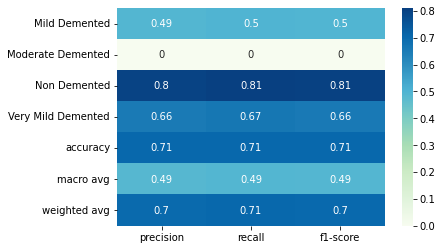

In [ ]:
generateCR(y_pred1)

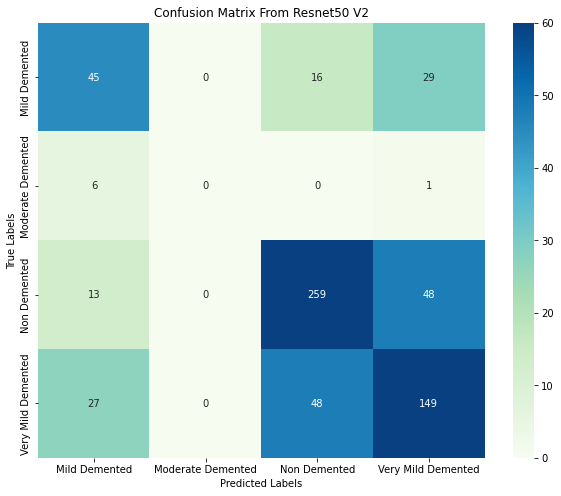

In [ ]:
generateCM(y_pred1, "Resnet50 V2")


## **InceptionV3**




In [ ]:
inception_model = InceptionV3(input_shape=(224,224,3), 
                   include_top=False,
                   weights="imagenet")

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception_model.layers:
    layer.trainable=False

In [ ]:
modelinceptionV3 = Sequential([
        inception_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')        
    ], name = "inception_cnn_model")

In [ ]:

EPOCHS = 30
BATCH_SIZE = 8
modelinceptionV3.compile(optimizer='adam',
loss= tf.losses.CategoricalCrossentropy(), metrics=METRICS)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)


In [ ]:
history3=modelinceptionV3.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset, callbacks=callback) 

Epoch 1/30
448/448 [==============================] - 24s 41ms/step - loss: 1.3836 - accuracy: 0.7386 - precision: 0.4585 - recall: 0.2516 - auc: 0.6877 - val_loss: 1.0658 - val_accuracy: 0.7863 - val_precision: 0.6259 - val_recall: 0.3608 - val_auc: 0.8007
Epoch 2/30
448/448 [==============================] - 16s 35ms/step - loss: 1.0977 - accuracy: 0.7543 - precision: 0.5150 - recall: 0.2913 - auc: 0.7721 - val_loss: 0.9889 - val_accuracy: 0.7853 - val_precision: 0.6047 - val_recall: 0.4078 - val_auc: 0.8192
Epoch 3/30
448/448 [==============================] - 16s 35ms/step - loss: 1.0362 - accuracy: 0.7641 - precision: 0.5511 - recall: 0.3039 - auc: 0.7915 - val_loss: 0.9765 - val_accuracy: 0.7863 - val_precision: 0.6259 - val_recall: 0.3608 - val_auc: 0.8188
Epoch 4/30
448/448 [==============================] - 16s 35ms/step - loss: 1.0151 - accuracy: 0.7681 - precision: 0.5721 - recall: 0.2877 - auc: 0.7971 - val_loss: 0.9564 - val_accuracy: 0.7892 - val_precision: 0.6613 - val_r

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss, auc,val_auc,precision,val_precision, recall, val_recall, f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5, ax6) = plt.subplots(1,6, figsize= (35,5))
    fig.suptitle(" Inception-V3 MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])


    ax5.plot(range(1, len(recall) + 1), recall)
    ax5.plot(range(1, len(val_recall) + 1), val_recall)
    ax5.set_title('History of Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])

    ax6.plot(range(1, len(f1) + 1), f1)
    ax6.plot(range(1, len(val_f1) + 1), val_f1)
    ax6.set_title('History of F1-score')
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('F1 score')
    ax6.legend(['training', 'validation'])

    

    
  


    plt.show()
    

Train_Val_Plot(history3.history['accuracy'],history3.history['val_accuracy'],
               history3.history['loss'],history3.history['val_loss'],
               history3.history['auc'],history3.history['val_auc'],
               history3.history['precision'],history3.history['val_precision'],
               history3.history['f1_score'],history3.history['val_f1_score'],
               history3.history['recall'],history3.history['val_recall'])
              

KeyError: ignored

In [ ]:
y_pred3 = modelinceptionV3.predict(submission)
y_pred3 = np.argmax(y_pred3, axis=1)

21/21 [==============================] - 4s 102ms/step


                    precision    recall  f1-score   support

     Mild Demented     0.3333    0.0889    0.1404        90
 Moderate Demented     0.0000    0.0000    0.0000         7
      Non Demented     0.6308    0.6406    0.6357       320
Very Mild Demented     0.3836    0.5000    0.4341       224

          accuracy                         0.5070       641
         macro avg     0.3369    0.3074    0.3025       641
      weighted avg     0.4957    0.5070    0.4887       641



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

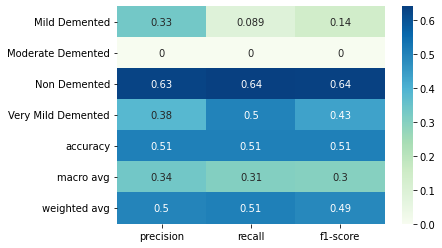

In [ ]:
generateCR(y_pred3)

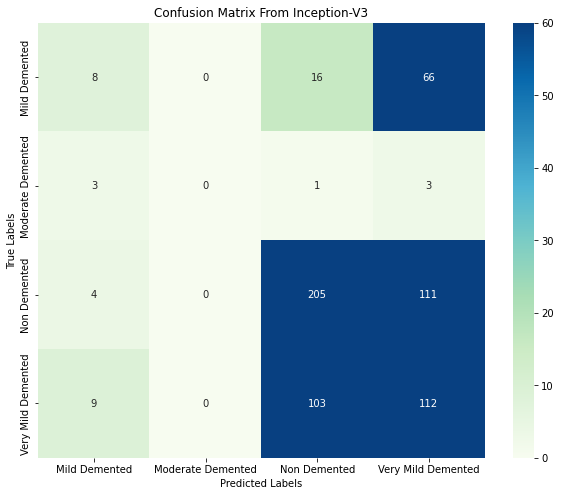

In [ ]:
generateCM(y_pred3, "Inception-V3")

## **DenseNet162**

In [ ]:
DenseNet_model = DenseNet169(input_shape=(224,224,3), 
                         include_top=False,
                         weights="imagenet")

51877672/51877672 [==============================] - 1s 0us/step


In [ ]:
for layer in DenseNet_model.layers:
    layer.trainable=False

In [ ]:
modelDenseNet =Sequential()
modelDenseNet.add(DenseNet_model)
modelDenseNet.add(Dropout(0.5))
modelDenseNet.add(Flatten())
modelDenseNet.add(BatchNormalization())
modelDenseNet.add(Dense(2048,kernel_initializer='he_uniform'))
modelDenseNet.add(BatchNormalization())
modelDenseNet.add(Activation('relu'))
modelDenseNet.add(Dropout(0.5))
modelDenseNet.add(Dense(1024,kernel_initializer='he_uniform'))
modelDenseNet.add(BatchNormalization())
modelDenseNet.add(Activation('relu'))
modelDenseNet.add(Dropout(0.5))
modelDenseNet.add(Dense(4,activation='softmax'))
modelDenseNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 dropout_10 (Dropout)        (None, 7, 7, 1664)        0         
                                                                 
 flatten_3 (Flatten)         (None, 81536)             0         
                                                                 
 batch_normalization_105 (Ba  (None, 81536)            326144    
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 2048)              166987776 
                                                                 
 batch_normalization_106 (Ba  (None, 2048)             8192      
 tchNormalization)                                    

In [ ]:
EPOCHS = 30
BATCH_SIZE = 8
modelDenseNet.compile(optimizer='adam',
loss= tf.losses.CategoricalCrossentropy(), metrics=METRICS)
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
history4=modelDenseNet.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset,callbacks=callback) 

Epoch 1/30
448/448 [==============================] - 52s 93ms/step - loss: 1.1047 - accuracy: 0.7966 - precision: 0.6064 - recall: 0.5314 - auc: 0.8350 - val_loss: 0.7217 - val_accuracy: 0.8578 - val_precision: 0.7412 - val_recall: 0.6627 - val_auc: 0.9090
Epoch 2/30
448/448 [==============================] - 37s 82ms/step - loss: 0.7897 - accuracy: 0.8467 - precision: 0.7055 - recall: 0.6638 - auc: 0.9041 - val_loss: 0.5750 - val_accuracy: 0.8843 - val_precision: 0.7773 - val_recall: 0.7529 - val_auc: 0.9407
Epoch 3/30
448/448 [==============================] - 36s 81ms/step - loss: 0.5692 - accuracy: 0.8931 - precision: 0.7984 - recall: 0.7656 - auc: 0.9450 - val_loss: 0.6061 - val_accuracy: 0.8843 - val_precision: 0.7729 - val_recall: 0.7608 - val_auc: 0.9413
Epoch 4/30
448/448 [==============================] - 37s 82ms/step - loss: 0.4706 - accuracy: 0.9072 - precision: 0.8223 - recall: 0.8019 - auc: 0.9611 - val_loss: 0.4917 - val_accuracy: 0.9010 - val_precision: 0.8156 - val_r

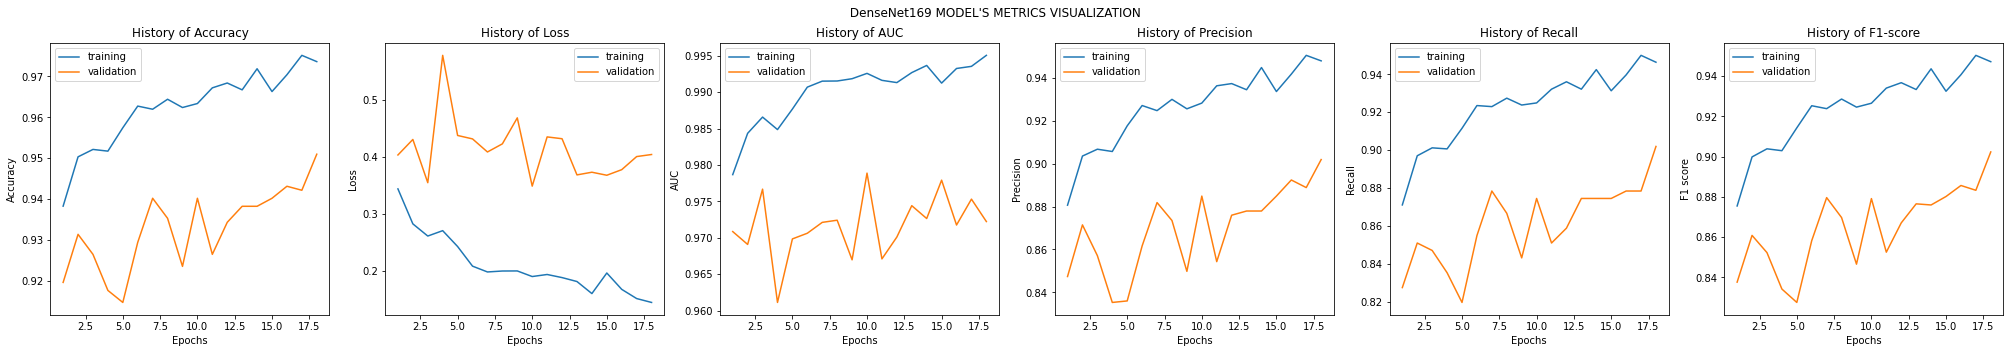

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1, recall, val_recall):
    
    fig, (ax1, ax2,ax3,ax4,ax5, ax6) = plt.subplots(1,6, figsize= (35,5))
    fig.suptitle(" DenseNet169 MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
      

    ax5.plot(range(1, len(recall) + 1), recall)
    ax5.plot(range(1, len(val_recall) + 1), val_recall)
    ax5.set_title('History of Recall')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('Recall')
    ax5.legend(['training', 'validation'])

    ax6.plot(range(1, len(f1) + 1), f1)
    ax6.plot(range(1, len(val_f1) + 1), val_f1)
    ax6.set_title('History of F1-score')
    ax6.set_xlabel('Epochs')
    ax6.set_ylabel('F1 score')
    ax6.legend(['training', 'validation'])

    
  


    plt.show()
    

Train_Val_Plot(history4.history['accuracy'],history4.history['val_accuracy'],
               history4.history['loss'],history4.history['val_loss'],
               history4.history['auc'],history4.history['val_auc'],
               history4.history['precision'],history4.history['val_precision'],
               history4.history['f1_score'],history4.history['val_f1_score'],
               history4.history['recall'],history4.history['val_recall'])

In [ ]:
y_pred4 = modelDenseNet.predict(submission)
y_pred4 = np.argmax(y_pred4, axis=1)

21/21 [==============================] - 8s 156ms/step


                    precision    recall  f1-score   support

     Mild Demented     0.4643    0.4333    0.4483        90
 Moderate Demented     0.0000    0.0000    0.0000         7
      Non Demented     0.9112    0.6094    0.7303       320
Very Mild Demented     0.5160    0.7902    0.6243       224

          accuracy                         0.6412       641
         macro avg     0.4729    0.4582    0.4507       641
      weighted avg     0.7004    0.6412    0.6457       641



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

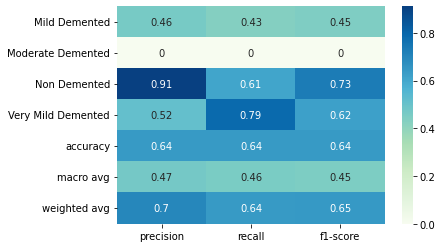

In [ ]:
generateCR(y_pred4)

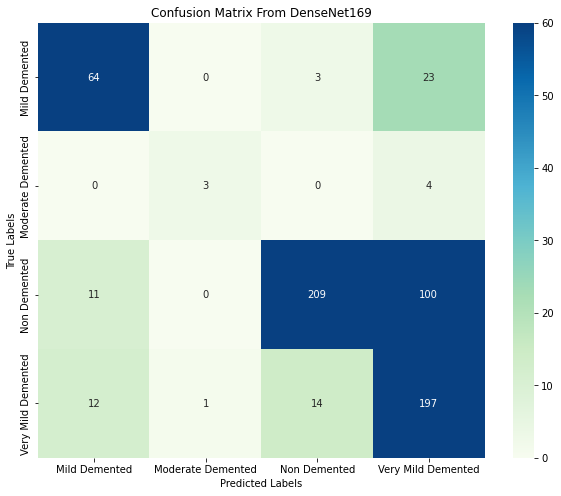

In [ ]:
generateCM(y_pred4, "DenseNet169")